In [35]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Input
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.callbacks import History
from keras.optimizers import SGD, Adam

In [2]:
#carichiamo il dataset in un dataframe
(X_train, y_train) , (X_test, y_test) = fashion_mnist.load_data()

In [6]:
#convertiamo le immagini in vettori
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)
X_train.shape

(60000, 784)

In [4]:
#normalizziamo il dataset, divido per il massimo (255)
X_train, X_test = X_train / 255, X_test / 255

In [8]:
#costruiamo un array per le classi
labels = ["T-shirt/top","Pantalone","Pullover","Vestito","Cappotto","Sandalo","Maglietta","Sneaker","Borsa","Stivaletto"]

#Encoding del target
num_classes=10

y_train_dummy = to_categorical(y_train, num_classes)
y_test_dummy = to_categorical(y_test, num_classes)

In [19]:
#creo il modello
def buil_model():
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [10]:
#disegno la funzione di costo
def plot_loss(optimizer, loss):
    plt.title(optimizer)
    plt.xlabel("Epoca")
    plt.ylabel("Log-Loss")
    plt.plot(loss)

In [11]:
#addestro il modello
def training(model, optimizer):
    history = History()
    model.fit(X_train, y_train_dummy, epochs=100, batch_size=512, callbacks=[history], verbose=0)
    metrics = model.evaluate(X_train, y_train_dummy, verbose=0)
    plot_loss(optimizer, history.history['loss'])
    return model

### Utilizziamo il momentum

In [20]:
model = buil_model()

In [21]:
sgd = SGD(momentum=0.9)     #implemento il valore del momentum a 0.9 come valore consigliato
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

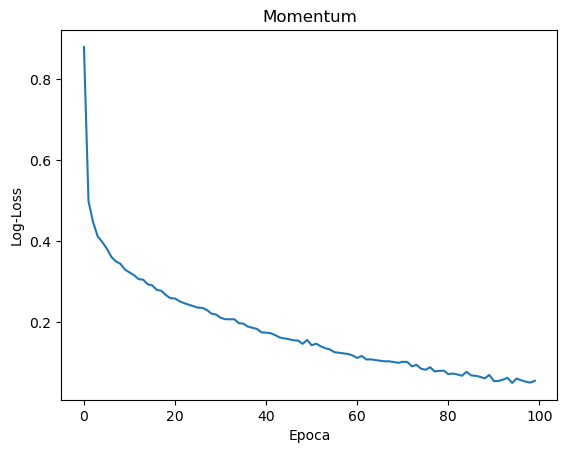

In [22]:
model = training(model, 'Momentum')

### Utilizziamo il nesterov momentum

In [24]:
#ricreo il modello
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [25]:
#creo il momentum
sgd = SGD(momentum=0.9, nesterov=True)

In [26]:
#compilo
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [27]:
#addestro il modello
history = History()
model.fit(X_train, y_train_dummy, epochs=100, batch_size=512, callbacks=[history])

Epoch 1/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5620 - loss: 1.3136
Epoch 2/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8136 - loss: 0.5304
Epoch 3/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8415 - loss: 0.4603
Epoch 4/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8520 - loss: 0.4259
Epoch 5/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8597 - loss: 0.3985
Epoch 6/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8650 - loss: 0.3888
Epoch 7/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8681 - loss: 0.3739
Epoch 8/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8721 - loss: 0.3597
Epoch 9/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8787 - loss: 0.3441
Epoch 10/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8815 - loss: 0.3332
Epoch 11/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8857 - loss: 0.3218
Epoch 12/100
118/118 ━━━━━━━━━━━━━━

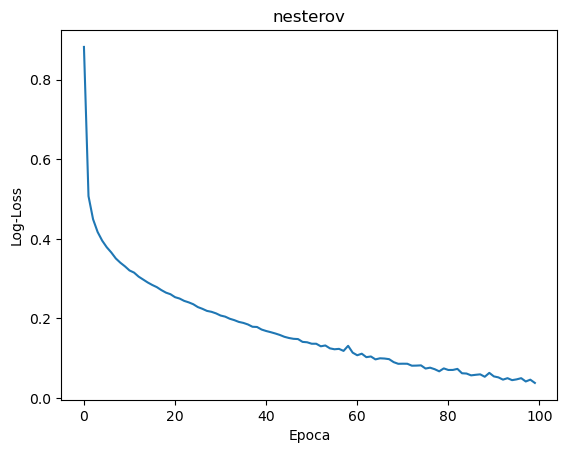

In [28]:
#plotto la funzione di costo
plt.title('nesterov')
plt.xlabel("Epoca")
plt.ylabel("Log-Loss")
plt.plot(history.history['loss'])                               #OTTIMI RISULTATI!

### Utilizzare il learning rate decay come algoritmo di ottimizzazione

In [29]:
#ricreo il modello
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [31]:
#creo il momentum, imposto un exponential decay per il rallentamento del learning rate
from keras.optimizers.schedules import ExponentialDecay

lr_schedule = ExponentialDecay(
    initial_learning_rate=0.01,  # Learning rate iniziale
    decay_steps=10000,           # Ogni quanti step applicare la riduzione
    decay_rate=1e-6,             # Fattore di riduzione
    staircase=True               # Se True, il decay avviene a step discreti
)

sgd = SGD(momentum=0.9, nesterov=True, learning_rate=lr_schedule)

In [32]:
#compilo
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [33]:
#addestro il modello
history = History()
model.fit(X_train, y_train_dummy, epochs=100, batch_size=512, callbacks=[history])

Epoch 1/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5717 - loss: 1.3074
Epoch 2/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8249 - loss: 0.5126
Epoch 3/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8435 - loss: 0.4466
Epoch 4/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8525 - loss: 0.4227
Epoch 5/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8647 - loss: 0.3883
Epoch 6/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8672 - loss: 0.3809
Epoch 7/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8724 - loss: 0.3601
Epoch 8/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8744 - loss: 0.3541
Epoch 9/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8798 - loss: 0.3427
Epoch 10/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8801 - loss: 0.3345
Epoch 11/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8865 - loss: 0.3170
Epoch 12/100
118/118 ━━━━━━━━━━━━━━━━━━━━

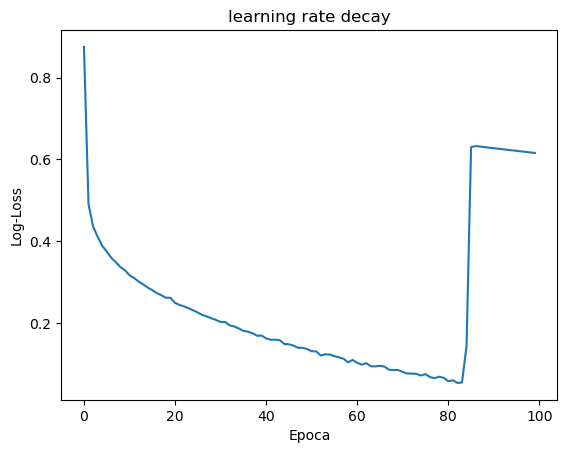

In [34]:
#plotto la funzione di costo
plt.title('learning rate decay')
plt.xlabel("Epoca")
plt.ylabel("Log-Loss")
plt.plot(history.history['loss'])               #non proprio la soluzione ottimale

## Utilizzare ADAM come algoritmo di ottimizzazione

In [36]:
#ricreo il modello
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [37]:
#creo l'ottimizzatore ADAM
adam = Adam()

In [38]:
#compilo modificando l'ottimizzatore
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [39]:
#addestro il modello
history = History()
model.fit(X_train, y_train_dummy, epochs=100, batch_size=512, callbacks=[history])

Epoch 1/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7118 - loss: 0.8554
Epoch 2/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8572 - loss: 0.3980
Epoch 3/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8765 - loss: 0.3460
Epoch 4/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8835 - loss: 0.3162
Epoch 5/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8931 - loss: 0.2939
Epoch 6/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8970 - loss: 0.2768
Epoch 7/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8999 - loss: 0.2680
Epoch 8/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9046 - loss: 0.2595
Epoch 9/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9146 - loss: 0.2328
Epoch 10/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9125 - loss: 0.2355
Epoch 11/100
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9182 - loss: 0.2203
Epoch 12/100
118/118 ━━━━━━━━━━━━━━━━━━━━

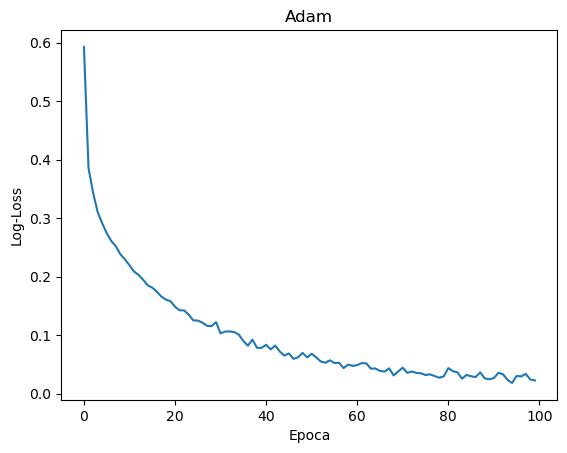

In [40]:
#plotto la funzione di costo
plt.title('Adam')
plt.xlabel("Epoca")
plt.ylabel("Log-Loss")
plt.plot(history.history['loss'])                   #ottimi risultati

### Valuto le ottime performance del modello con Adam sul test set

In [41]:
model.evaluate(X_test, y_test_dummy)        #non sono malissimo ma confrontate con le performance sul train -> OVERFITTING

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8920 - loss: 0.8758


[0.8835507035255432, 0.8913999795913696]